## Regresión Logistica

### Definición

A diferencia de la regresión lineal, la regresión logística tiene como finalidad determinar probabilísticamente si un punto dado pertenece o no a una clase. La salida de una regresión logística siempre esta entre [0,1].

La principal diferencia con la regresión lineal es que la regresión lineal nos dan valores continuos mientras que la regresión logística posee tan solo dos valores como lo pueden ser 0 o 1.

Entonces podemos usar la regresión logística en aplicaciones como:

   * Ver si un usuario que entra a una tienda (online o no) comprará o no.
   * Ver si un equipo de futbol ganará o no en base a ciertas caracteristicas (jugadas , fechas , localía , etc).
   * Si un grupo de personas votará por el candidato A o el candidato B.
   
Como se puede notar en todas estos casos se tiene una cierta clasificación en vez de hallar un valor continuo como el ejemplo principal de una regresión lineal que es el precio de una casa debido a sus características.

Aún asi en la regresión logística se usará ciertos conceptos de la regresión lineal pero con ligeros cambios para poder llegar a estos casos en los que no se necesitará un valor continuo, en concreto se aplicará cierta transformación:

![](linealvslogistica.png)

Para ser más precisos se tendrá una transformación en la que se usará cierta función que tomará un valor, la usará como un umbral y decidirá a que clase se dirigirá nuestros valores en base a este umbral.

Como ejemplo tenemos el gráfico "ingreso de votantes" vs "candidato elegido" 

![](logisticacandidatos.png)

Y aqui observamos como a medida que un votante tiene más ingreso económico su voto es por el candidato A mientras que si el votante tiene un ingreso económico humilde o bajo su voto será por el candidato B.

Aqui explicando la definición de umbral, podemos tomar el valor 0.5 como umbral (en inglés trhreshold) y si el valor es mayor que 0.5 será elegido el candidato A y caso contrario el candidato B.

### Comprendiendo las cuotas

Como se mencionó en el comienzo la regresión logística usará probabilidades por lo que es importante primero definir lo que es una cuota antes de adentrarnos en el algoritmo.

Una cuota se define como la división de la probabilidad de exito vs la probabilidad de fallo

![](cuota.png)

Por ejemplo al lanzar una moneda tenemos 50% (0.5) de posibilidades de salir cara por lo que la cuota será:

$$ C = \dfrac{0.5}{1-0.5} = 1 $$

Pero si se encuentra manipulada es decir hay un 80% de probabilidad de salir cara la cuota será:

$$ C = \dfrac{0.8}{1-0.8} = 4 $$

Esto significa que es 4 veces más probabile que salga cara que salga sello.

**Importante** : Esto es usado en las casas de apuestas para definir la cantidad a pagar. Por ejemplo en una carrera de caballos tenemos entre 3 caballos uno más probable gane por lo que la cuota a pagar por la casa de apuesta será menos (cuota inversa a probabilidad) que un caballo que es poco probable que gane.

### Función Logit

Cuando aplicas la función logaritmo natural a una cuota, tu obtienes la función Logit. En pocas palabras la función logit es el logaritmo de la cuota.

![](logitf.png)

Si somos suspicaces podemos darnos cuenta como la cuota esta entre 0 y 1 pero al aplicar el logaritmo estos valores van de $(-\infty, +\infty)$

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logit(x):
    cuota = x / (1-x)
    return np.log(cuota)

Text(0.5, 1.0, 'Función Logit')

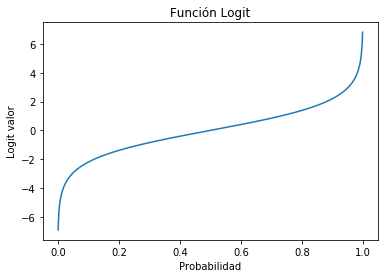

In [4]:
x = np.arange(0.001, 0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probabilidad")
plt.ylabel("Logit valor")
plt.title("Función Logit")

### Función sigmoide

Si nos damos cuenta en el eje X tenemos las probabilidades que son valores de 0 a 1, mientras que en el eje Y tenemos valores que no van de 0 a 1 pero lo que buscamos nosotros en la regresión logistica es justamente lo contrario en lo que respecta a los ejes, por lo que corregir esto es tan simple como hacer lo siguiente:

![](sigmoide.png)

Lo que obtenemos es conocida como la función sigmoide la cual es el inverso de la función Logit. Entonces tenemos una función que va de $(-\infty,\infty)$ a números entre $(0,1)$

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

Text(0, 0.5, 'Probability')

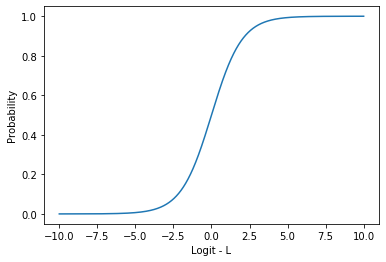

In [6]:
x = np.arange(-10, 10, 0.00001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

Al igual que cuando en la regresión lineal buscabamos una recta que se acercase a todos los puntos que tenemos, en la regresión lineal se buscará lo mismo por lo que matemáticamente podemos expresar este deseo como:

![](sigmoidvalues.png)

Entonces ahora nuestra labor será hallar los coeficientes $\beta_{0} \; y \; \beta$ para esto se usará la técnica conocida como Máxima verosimilitud (Maximum Likelihood Estimation , MLE en inglés).

En la regresión logística $\beta_{0}$ es conocido como intercepto y $x \beta$ es conocido como el coeficiente.

### Usando el set de datos de Cancer de mama Wisconsin

Este datos de set es clásico para ilustrar clasificaciones binarias. Contiene 30 features o variables independientes y se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. La clasificación se puso como M de maligna y B de benigna.
Se encuentra más información en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#### Examinando la relación entre sus features

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

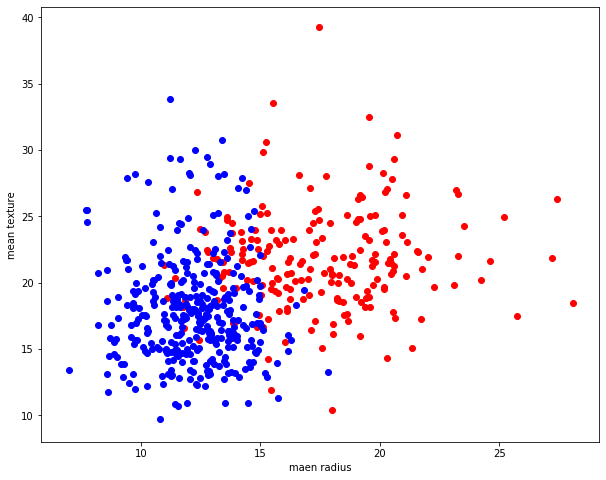

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

x = []
for target in range(2):
    x.append([[], []])
    for i in range(len(cancer.data)):
        if cancer.target[i] == target:
            x[target][0].append(cancer.data[i][0])
            x[target][1].append(cancer.data[i][1])

colours = ("r","b")
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(x[target][0],
               x[target][1],
               c = colours[target])
    
ax.set_xlabel("maen radius")
ax.set_ylabel("mean texture")
plt.show()

###  En 3D

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

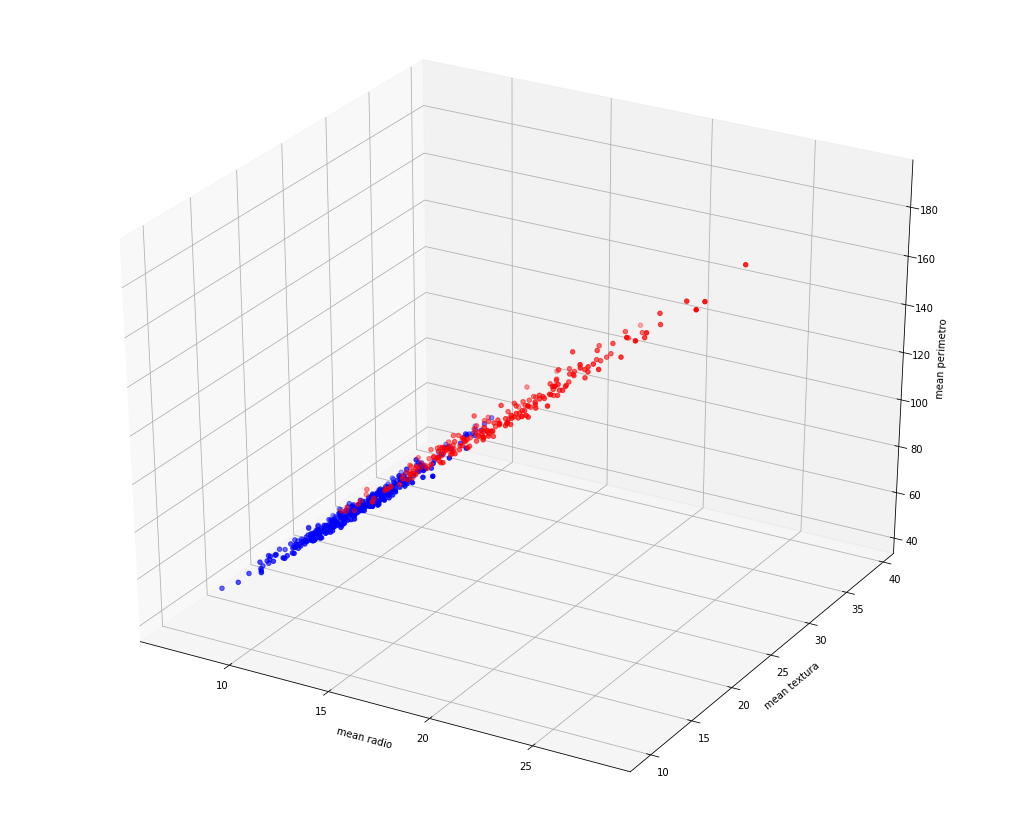

In [11]:
X = []

for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])
        
colours = ("r", "b")
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])
    
ax.set_xlabel("mean radio")
ax.set_ylabel("mean textura")
ax.set_zlabel("mean perimetro")
plt.show()        

Cabe decir que como es un jupyter no podremos girar la imagen en 3D pero desde una terminal si podemos hacerlo.